# 1.   Вводные данные

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
У нас в распоряжении имеются данные о продаже игр за несколько лет – названия, продажи в разных регионах, рейтинги и оценки критиков и пользователей. Наша задача – проверить данные, проанализировать их и сделать соответствующие выводы. Мы рассмотрим:
<br><br>- Сколько игр выпускалось в разные годы
<br><br>- Как менялись продажи по платформам
<br><br>- Рассмотрим платформы с наибольшими суммарными продажами
<br><br>- Выделим актуальный период для исследования
<br><br>- Посмотрим, как влияют на продажи отзывы пользователей и критиков
<br><br>- Построим распределение игр по жанрам</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
display(df.head())
print(df.shape)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


(16715, 11)


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Приведем все названия столбцов к нижнему регистру</div>

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Исследуем данные</div>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Столбцы с названием, годом релиза, жанром, оценкой критиков, пользователей и возрастным рейтингом имеют ошибки. С них то мы и начнем</div>

# 2.   Обработка данных

## 2.1.   Год релиза

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Выведем игры, в которых неизвестен год релиза</div>

In [7]:
display(df[df.year_of_release.isna()].head())
print(df[df.year_of_release.isna()].shape)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


(269, 11)


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
269 пропусков из 16715 строк данных: год достать очень непросто, так что мы выкинем эти данные</div>

In [8]:
df = df[df.year_of_release.notna()].reset_index(drop=True)

In [9]:
display(df[df.year_of_release.isna()].head())
print(df[df.year_of_release.isna()].shape)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


(0, 11)


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Отлично, с годами разобрались</div>

## 2.2.   Оценки

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Посмотрим на уникальность пользовательских оценок</div>

In [11]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
nan – это, конечно, хорошо, но tbd лучше</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
В интернетах пишут, что tbd – это от слова "to be definition", то есть еще не определено. Есть вероятность, что это совсем свежие, относительно данных, игры</div>

In [12]:
df[df.user_score == 'tbd'].year_of_release.unique()

array([2010., 2005., 2011., 2009., 2004., 1999., 2001., 2008., 2007.,
       2003., 2000., 2006., 2002., 2015., 2014., 2012., 2013., 2016.,
       1997.])

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Теория не подтвердилась, и, скорее всего, оценка за эти игры либо не была выставлена вообще, либо просто не подтянулась в данные</div>

In [13]:
df[df.user_score == 'tbd'].shape

(2376, 11)

In [14]:
df[df.user_score.isna()].shape

(6607, 11)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Довольно много подобных строк, и оставлять их вообще без чистки будет вредно</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Фактически, для нас это – nan, а значит надо привести к этому типу, чтобы заполнять все и сразу</div>

In [15]:
df.loc[df.user_score == 'tbd', 'user_score'] = np.nan

In [16]:
df['user_score'] = df.user_score.astype(float)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Смотрим, сколько данных утеряно</div>

In [17]:
df[df.user_score.isna()].shape

(8983, 11)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Подставить оценки, основанные на каких либо данных – не вариант, пары игра-платформа уникальны по годам, так что опереться не на что. Мы можем просто фильтровать данные при анализе, чтобы работать с известными </div>

In [18]:
df[(df.critic_score.notna()) |
   (df.user_score.notna()) | 
   (df.rating.notna())].shape

(9864, 11)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Небогато, но это лишь данные с оценками и рейтингами без пропусков всех их сразу</div>

## 2.4.   Название

In [21]:
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
652,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14022,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
В этих данных неизвестно почти все: год и рейтинг есть, но нет жанра и оценок. С таким мы далеко не уйдем</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Решение изящное и элегантное – удаляем</div>

In [22]:
df = df[df.name.notna()].reset_index(drop=True)

In [23]:
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales


## 2.5.   Жанр

In [24]:
df[df.genre.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Видимо, ушли вместе с предыдущими строками</div>

# 3.   Исследовательский анализ

## 3.1.   Количество игр по годам

Text(0, 0.5, 'games_sales_count')

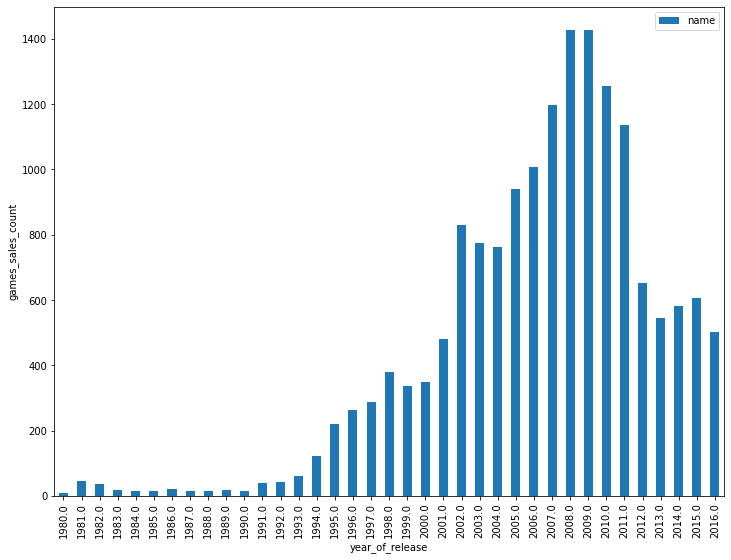

In [28]:
ax = (df.pivot_table(index='year_of_release', 
                values='name', 
                aggfunc='count')
 .plot(kind='bar', 
       figsize=(12, 9)))
ax.set_ylabel("games_sales_count")

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Допустим, нас в светлом будущем не очень интересуют данные о продажах в эпоху отсутствия Steam и иже с ними. Как минимум – хотя бы продажи более 200 копий</div>

In [29]:
df = df.query('year_of_release > 1994')

Text(0, 0.5, 'games_sales_count')

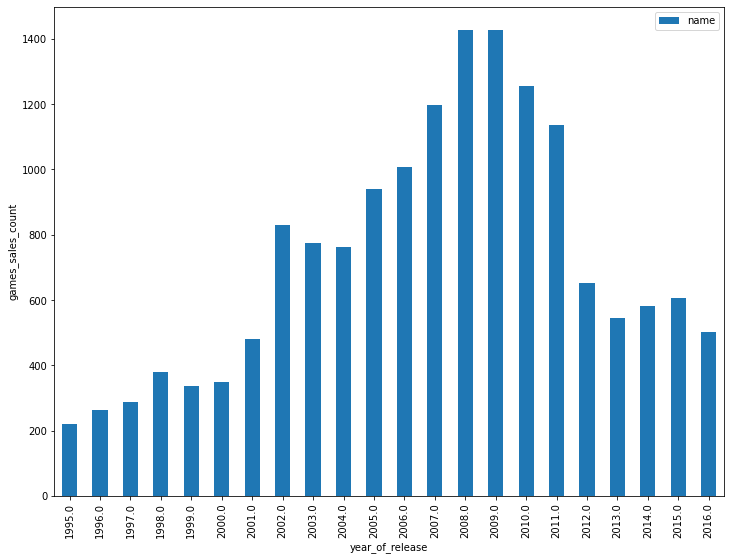

In [30]:
ax = (df.pivot_table(index='year_of_release', 
                values='name', 
                aggfunc='count')
 .plot(kind='bar', 
       figsize=(12, 9)))
ax.set_ylabel("games_sales_count")

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Теперь мы хотя бы будем работать с данными, имеющими вес</div>

## 3.2.   Популярные платформы

In [31]:
(df.pivot_table(index=['year_of_release', 'platform'], 
               values='summary_sales', 
               aggfunc='sum')
 # сортируем по продажам, чтобы оставить наибольшие продажи внизу
 .sort_values(by='summary_sales')
 # убираем мульти-индекс
 .reset_index()
 # удаляем дубликаты, оставляя только последние
 .drop_duplicates('year_of_release', keep='last')
 # сортируем в привычный порядок лет
 .sort_values(by='year_of_release'))

,year_of_release,platform,summary_sales
116,1995.0,PS,35.96
152,1996.0,PS,94.70
169,1997.0,PS,136.17
180,1998.0,PS,169.49
173,1999.0,PS,144.53
154,2000.0,PS,96.37
179,2001.0,PS2,166.43
184,2002.0,PS2,205.38
183,2003.0,PS2,184.31
186,2004.0,PS2,211.81


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Визуальные выводы: лидирует в основном PlayStation на любых этапах, есть целых 4 года лидерства Wii, иногда место занимает Xbox, но незначительно</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Чуть интереснее – период смены поколений. Не уходя в анализ годов выпуска новых, можно заметить тенденцию на лидерство платформы в течении 4 лет</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Соответственно, для нас таким будет как раз период 4 лет: в 2014, 2015 и 2016 году лидирует PS4, предполагаем, что в 2017 будет так же</div>

## 3.3.   Актуальный период

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Срезаем не интересующие нас данные</div>

In [32]:
df = df.query('year_of_release > 2013')

In [33]:
df.year_of_release.unique()

array([2015., 2014., 2016.])

## 3.4.   Продажи по платформам

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Так как платформ много, а исследовать все не имеет смысла, возьмем топ продаж – по визуальным прикидкам это более 50 </div>

In [34]:
df_top_platform = (df.pivot_table(index=['year_of_release', 'platform'], 
               values='name', 
               aggfunc='count')
 .sort_values(by='name')
 .reset_index()
 # на этом моменте срезаем количество выше 50
 .query('name >= 50')
 .sort_values(by='year_of_release'))

In [35]:
df_top_platform

,year_of_release,platform,name
15,2014.0,XOne,61
16,2014.0,X360,63
18,2014.0,PS4,75
19,2014.0,3DS,80
24,2014.0,PSV,100
25,2014.0,PS3,108
13,2015.0,PC,50
17,2015.0,PS3,73
20,2015.0,XOne,80
22,2015.0,3DS,86


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Данных много, визуально оценить сложно, нарисуем график</div>

Text(0, 0.5, 'consoles_sales_count')

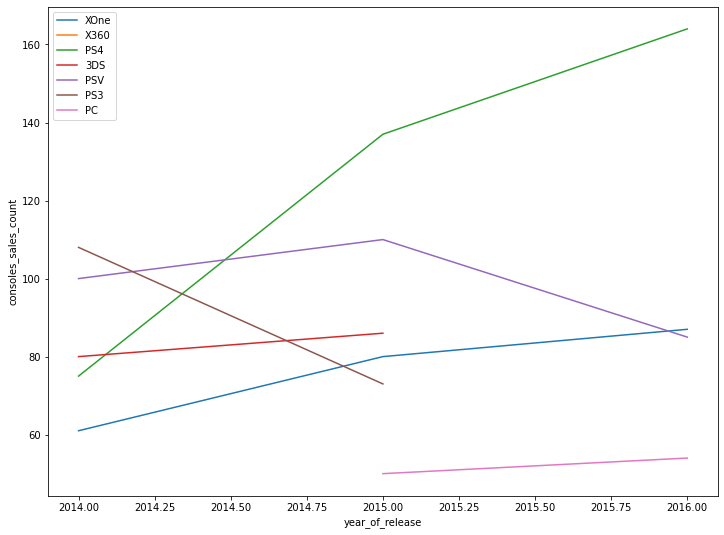

In [36]:
fig, ax = plt.subplots()
for i in df_top_platform.platform.unique():
    df_top_platform.query('platform == @i').plot(x='year_of_release', y='name', label=i, ax=ax, figsize=(12, 9))
ax.set_ylabel("consoles_sales_count")

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь можно более четко увидеть уверенный рост PS4, не такой уверенный, но все еще рост Xbox One, уверенное падение PS3 и PS Vita, и робкий рост PC</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Для себя делаем пометочку – обращать внимание в основном на Xbox One и PS4</div>

## 3.5.   Ящик с усами

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Посмотрим, кто у нас остался из платформ</div>

In [37]:
df.platform.unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
И построим по ним ящики с усами</div>

<AxesSubplot:title={'center':'summary_sales'}, xlabel='platform'>

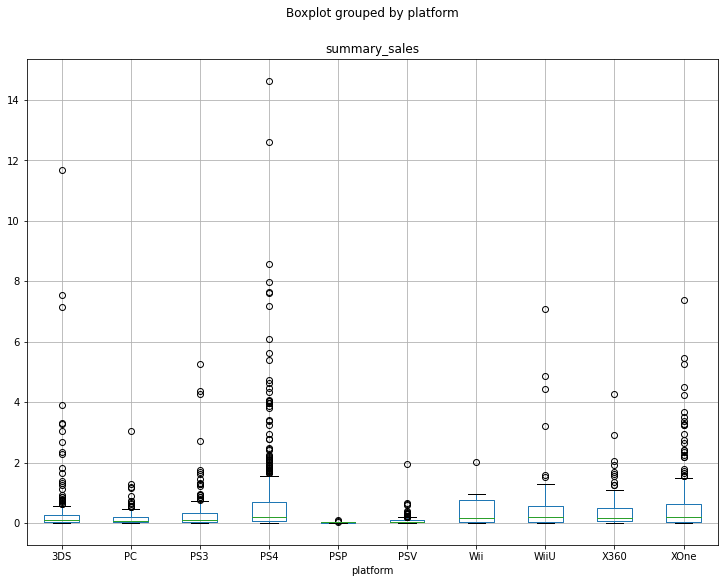

In [38]:
df.boxplot(column='summary_sales', by='platform', figsize=(12, 9))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Мелкий формат хорошо показывает выбросы, но учитывая эксклюзивы для различных платформ, сложности с наличием другие и подобные эксцессы – на них можно пока не обращать внимание</div>

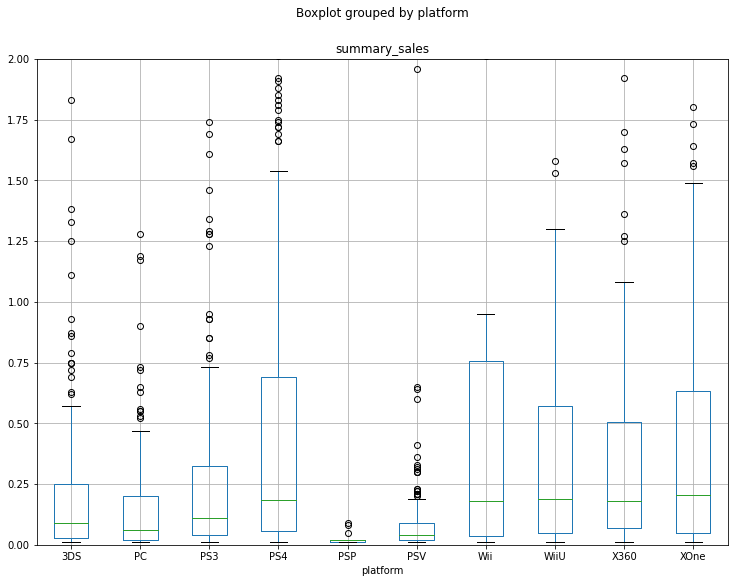

In [39]:
df.boxplot(column='summary_sales', by='platform', figsize=(12, 9))
plt.ylim(0, 2)
plt.show()

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь четко видны лидеры: Wii, WiiU, PS4, Xbox One</div>

## 3.6.   Влияние отзывов на продажи

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Пойдем простым путем - построим скаттер плот по распределению отзывов критиков и продажам</div>

<AxesSubplot:xlabel='critic_score', ylabel='summary_sales'>

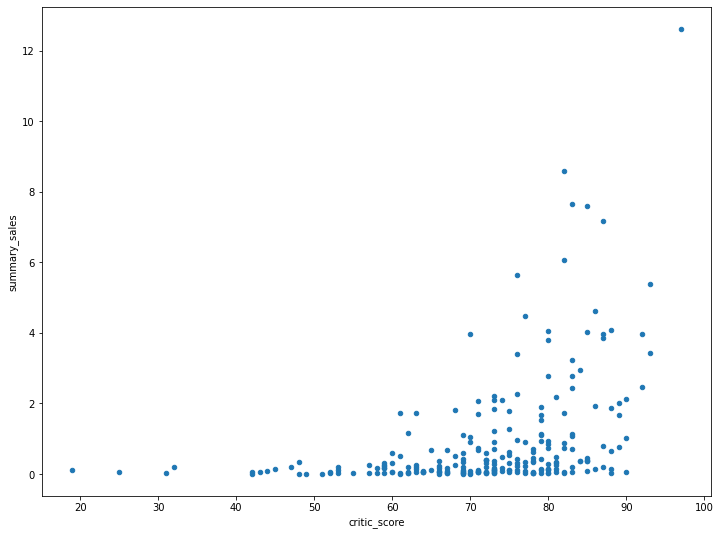

In [40]:
df.query('platform == "PS4" and critic_score.notna()').plot(x='critic_score', 
                                   y='summary_sales', 
                                   kind='scatter', 
                                   figsize=(12, 9))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь видна логичная закономерность – чем выше ставят оценку критики, тем сильнее растут продажи, но большинство продаж все еще сконцентрировано внизу графика</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
И посмотрим корреляцию</div>

In [41]:
df.query('platform == "PS4" and critic_score.notna()')[['summary_sales', 'critic_score']].corr()

,summary_sales,critic_score
summary_sales,1.000000,0.402661
critic_score,0.402661,1.000000


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
40% – не так много, корреляция слабее, чем визуально на графике</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Возьмем для сравнения другую платформу</div>

<AxesSubplot:xlabel='critic_score', ylabel='summary_sales'>

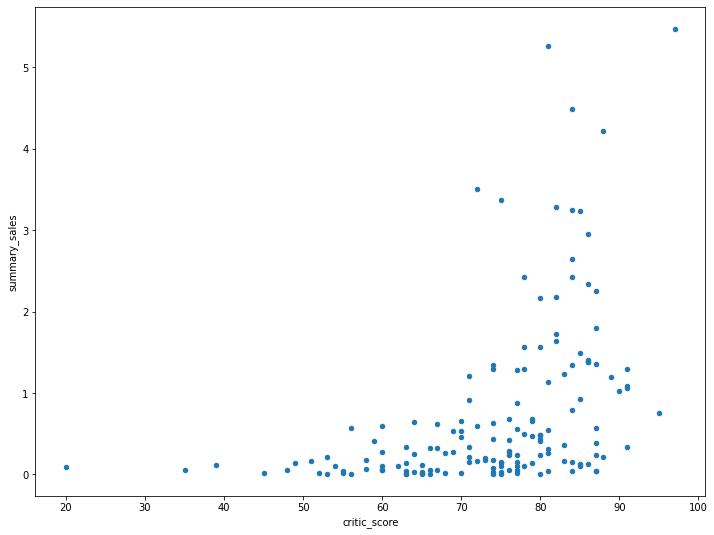

In [42]:
df.query('platform == "XOne" and critic_score.notna()').plot(x='critic_score', 
                                   y='summary_sales', 
                                   kind='scatter', 
                                   figsize=(12, 9))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
С графиком та же история</div>

In [43]:
df.query('platform == "XOne" and critic_score.notna()')[['summary_sales', 'critic_score']].corr()

,summary_sales,critic_score
summary_sales,1.000000,0.428677
critic_score,0.428677,1.000000


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Корреляция примерно на том же уровне, чуть выше – 42%</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Для разнообразия посмотрим на график по всем платформам</div>

<AxesSubplot:xlabel='critic_score', ylabel='summary_sales'>

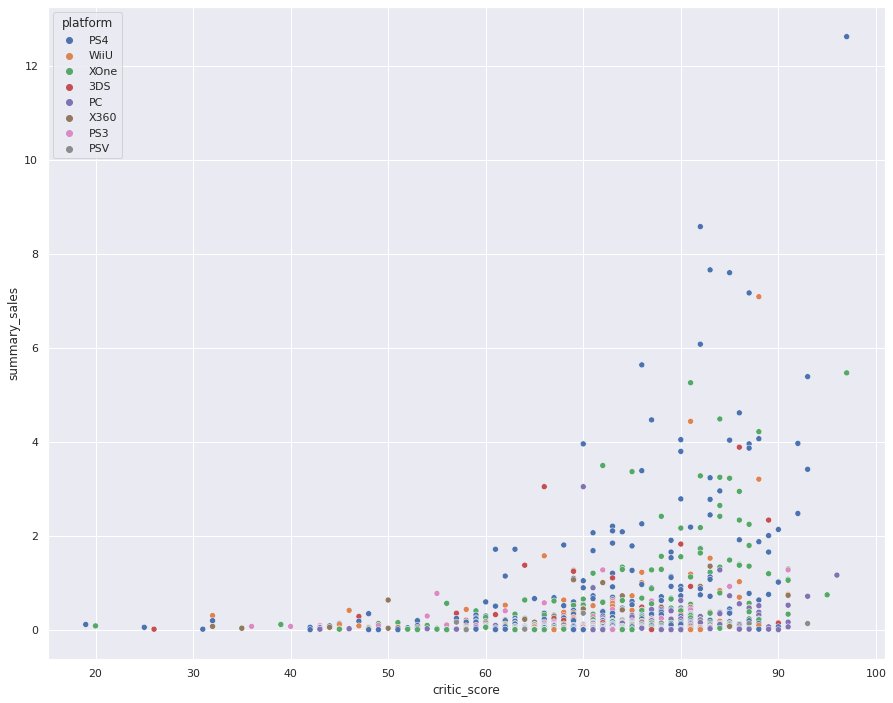

In [44]:
sb.set(rc={'figure.figsize':(15, 12)})
sb.scatterplot(x='critic_score', 
               y='summary_sales', 
               hue='platform', 
               data=df.query('critic_score.notna()'))

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Отклонений от привычного уклада не наблюдается</div>

In [45]:
df.query('critic_score.notna()')[['summary_sales', 'critic_score']].corr()

,summary_sales,critic_score
summary_sales,1.000000,0.328105
critic_score,0.328105,1.000000


<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Общая корреляция довольно слабая, это говорит нам о том, что хоть при низких оценках игру вообще не покупают в больших тиражах, но высокие оценки критиков очень слабо влияют на количество продаж</div>

## 3.7.   Распределение игр по жанрам

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Посмотрим на самые продаваемые жанры</div>

Text(0, 0.5, 'summary_games_sales')

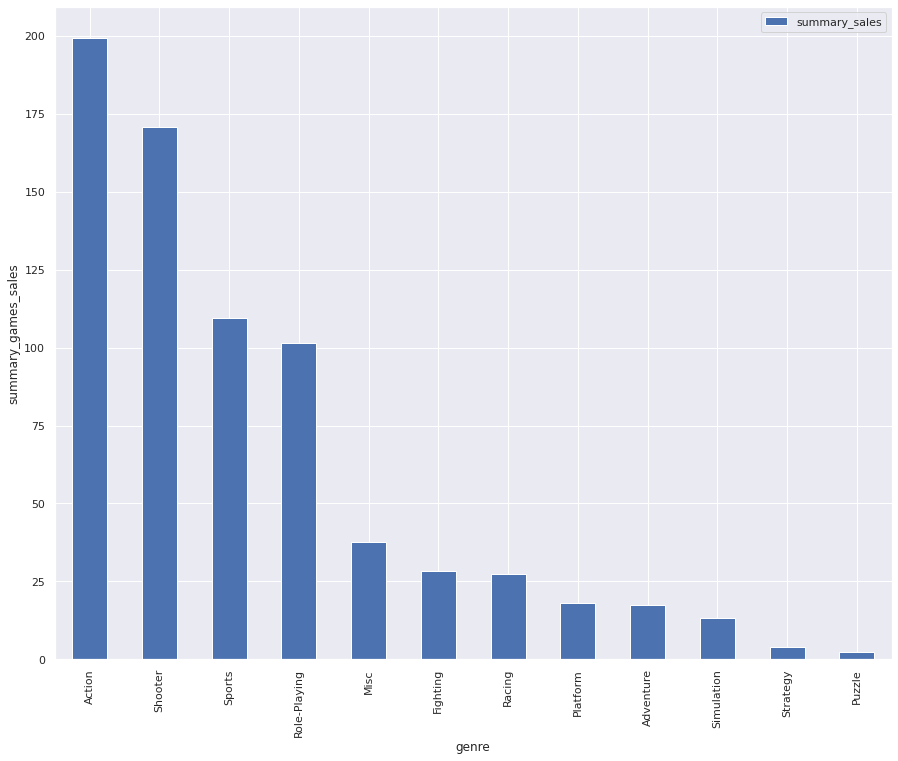

In [46]:
ax = (df.pivot_table(index='genre', values='summary_sales', aggfunc='sum')
 .sort_values(by='summary_sales', ascending=False)
 .plot(kind='bar'))
ax.set_ylabel("summary_games_sales")

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Лидируют Action и Shooter, уверенную планку держат Sports и Role-Playing</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Посмотрим на средние показатели продаж</div>

Text(0, 0.5, 'summary_games_sales')

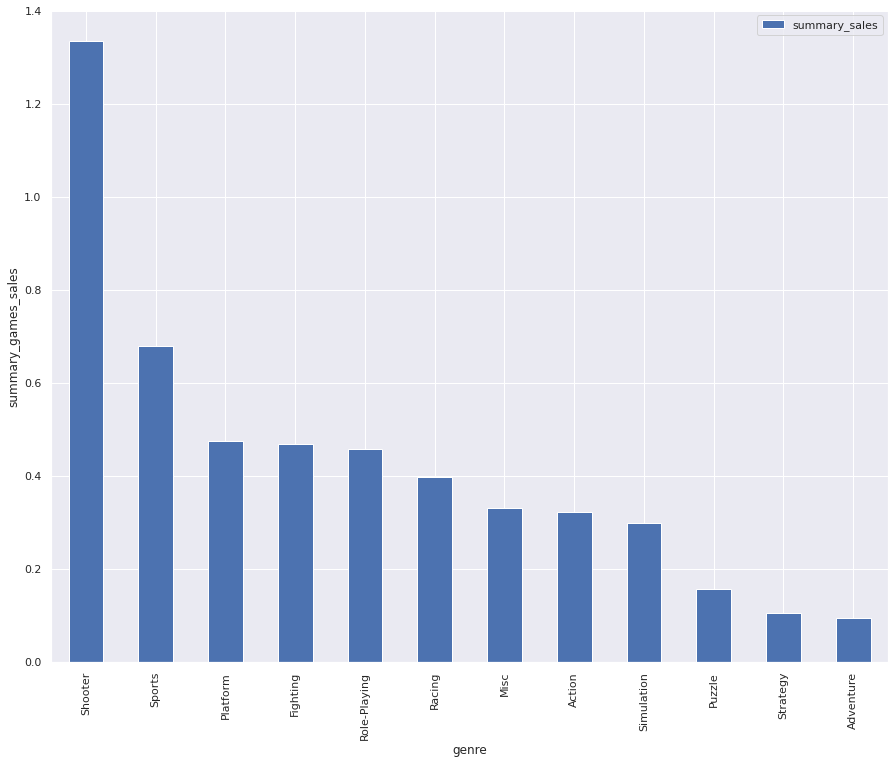

In [47]:
ax = (df.pivot_table(index='genre', values='summary_sales', aggfunc='mean')
 .sort_values(by='summary_sales', ascending=False)
 .plot(kind='bar'))
ax.set_ylabel("summary_games_sales")

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Здесь картина интереснее: Shooter в лидерах, на втором месте, но с большим отрывом Sports, остальные показатели кратно меньше</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Можно сделать вывод, что суммарные данные и средние показатели сильно разнятся – могу сделать предположение, что вопрос цены, на Sports ценник выше, и среднее задирается, а на остальные жанры – ниже, хотя суммарно на них тратят больше, что говорит о большом количестве проданных копий</div>

# 4.   Портрет пользователя по регионам

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Проведем процедуру анализа игроков из разных регионов по доступным нам данным</div>

In [48]:
temp = df.copy()
temp.rating = temp.rating.fillna('Na in country')

## 4.1.   Самые популярные платформы

In [49]:
na_platform_data = temp.pivot_table(index='platform', 
               values='na_sales', 
               aggfunc='sum').sort_values(by='na_sales', 
              ascending=False).head()

eu_platform_data = (temp.pivot_table(index='platform', 
               values='eu_sales', 
               aggfunc='sum').sort_values(by='eu_sales', 
              ascending=False)).head()

jp_platform_data = (temp.pivot_table(index='platform', 
               values='jp_sales', 
               aggfunc='sum').sort_values(by='jp_sales', 
              ascending=False)).head()

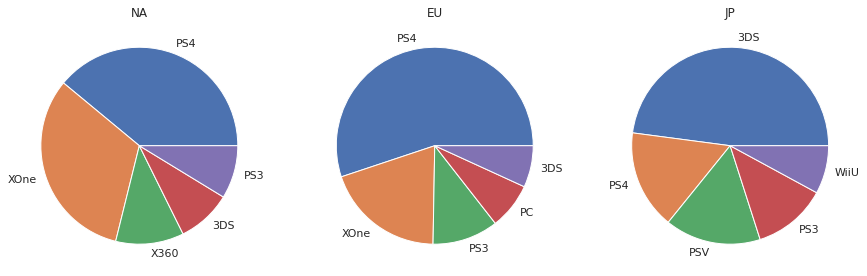

In [50]:
fig, ax = fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))
ax1.pie(x=na_platform_data.na_sales, labels=na_platform_data.index)
ax1.set_title("NA")
ax2.pie(x=eu_platform_data.eu_sales, labels=eu_platform_data.index)
ax2.set_title("EU")
ax3.pie(x=jp_platform_data.jp_sales, labels=jp_platform_data.index)
ax3.set_title("JP")
plt.show()

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Игроки в na отдают предпочтение PS4 и Xbox One, остальные платформы сильно ниже по показателям</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
В eu есть более четкий лидер – PS4, все другие платформы значительно ниже по показателям</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
В далеком и таком непонятном jp лидирует 3DS; причем настолько, что остальные платформы нет смысла рассматривать как конкурентов</div>

## 4.2.   Самые популярные жанры

In [51]:
na_genre_data = temp.pivot_table(index='genre', 
               values='na_sales', 
               aggfunc='sum').sort_values(by='na_sales', 
              ascending=False).head()

eu_genre_data = (temp.pivot_table(index='genre', 
               values='eu_sales', 
               aggfunc='sum').sort_values(by='eu_sales', 
              ascending=False)).head()

jp_genre_data = (temp.pivot_table(index='genre', 
               values='jp_sales', 
               aggfunc='sum').sort_values(by='jp_sales', 
              ascending=False)).head()

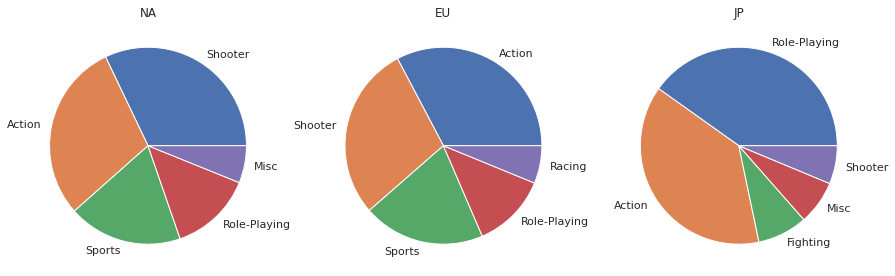

In [52]:
fig, ax = fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))
ax1.pie(x=na_genre_data.na_sales, labels=na_genre_data.index)
ax1.set_title("NA")
ax2.pie(x=eu_genre_data.eu_sales, labels=eu_genre_data.index)
ax2.set_title("EU")
ax3.pie(x=jp_genre_data.jp_sales, labels=jp_genre_data.index)
ax3.set_title("JP")
plt.show()

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
В na мы можем наблюдать плавный спад интереса – на первом месте Shooter, на втором с небольшим отставанием – Action. Остальные показатели идут с чуть большим разрывом</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
По жанрам в eu – такой же плавный спад интереса, тройка лидеров: Action, Shooter, Sports</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
У jp два четких, подавляющих лидера: Role_playing и Action</div>

## 4.3.   Влияние рейтинга ESRB

In [53]:
na_rating_data = (temp.pivot_table(index='rating', 
               values='na_sales', 
               aggfunc='sum').sort_values(by='na_sales', 
              ascending=False)).head()

eu_rating_data = (temp.pivot_table(index='rating', 
               values='eu_sales', 
               aggfunc='sum').sort_values(by='eu_sales', 
              ascending=False)).head()

jp_rating_data = (temp.pivot_table(index='rating', 
               values='jp_sales', 
               aggfunc='sum').sort_values(by='jp_sales', 
              ascending=False)).head()

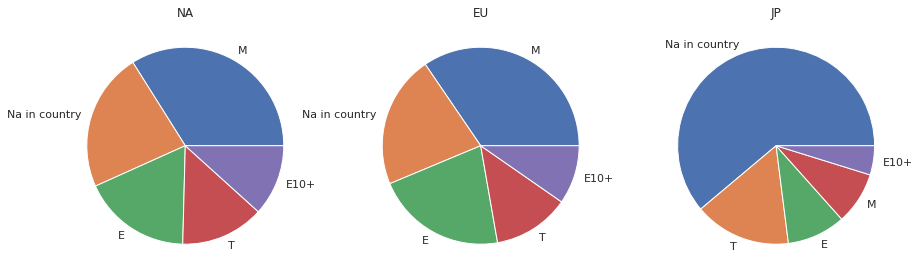

In [54]:
fig, ax = fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))
ax1.pie(x=na_rating_data.na_sales, labels=na_rating_data.index)
ax1.set_title("NA")
ax2.pie(x=eu_rating_data.eu_sales, labels=eu_rating_data.index)
ax2.set_title("EU")
ax3.pie(x=jp_rating_data.jp_sales, labels=jp_rating_data.index)
ax3.set_title("JP")
plt.show()

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Тренд: в na игры с рейтингом M продаются лучше всего, вторым по счету идут игры без доступного рейтинга, остальные рейтинги не имеют такого уровня продаж, но не отличаются друг от друга критически</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
В eu история повторяется, но рейтинг Е имеет чуть больший вес</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
jp отдают предпочтение играм, не имеющим рейтинг штатов, а остальные рейтинги суммарно дают меньше половины</div>

## 4.4.   Общий вывод

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
В na и eu игроки в целом похожи – любимые платформы PS4 и Xbox One, самый популярный жанр – Shooter. С jр история чуть более интересная – там лидирует платформа 3DS и жанр Role-Playing, однако, Action их всех объединяет</div>

# 5.   Проверка гипотез

## 5.1.   Рейтинги платформ одинаковые

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Нулевая гипотеза: рейтинг платформы Xbox One и Playstation 4 одинаковый</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Это предположение, которое мы будем считать истиным, если оно подтвердится статистическими тестами. В ином случае, за истиную будет принята альтернативная гипотеза: рейтинги платформ Xbox One и Playstation 4 различаются</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Рассчитаем средний рейтинг каждой платформы</div>

In [56]:
df.query('platform == "XOne" and user_score.notna()').loc[df.user_score.notnull(), 'user_score'].mean()

6.594545454545456

In [57]:
df.query('platform == "PS4"  and user_score.notna()').loc[df.user_score.notnull(), 'user_score'].mean()

6.82809917355372

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Визуально они очень похожи, но не лишним будет провести т-тест</div>

In [58]:
(st.ttest_ind(df.query('platform == "XOne" and user_score.notna()').loc[df.user_score.notnull(), 
                                                                        'user_score'], 
              df.query('platform == "PS4" and user_score.notna()').loc[df.user_score.notnull(), 
                                                                       'user_score'])
 .pvalue)

0.09668975421672833

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
9% – в целом достаточно для положительного решения относительно нулевой гипотезы</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Ответ: да, средний рейтинг платформ Xbox One и Playstation 4 одинаковый</div>

## 5.2.   Рейтинги жанров разные

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Нулевая гипотеза: рейтинг жанра Action и жанра Sports разные</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Данную гипотезу будем считать истиной в случае подтверждения тестом, иначе за истину возьмем альтернативную гипотезу: рейтинги жанров Action и Sports одинаковы</div>

In [59]:
df.query('genre == "Action" and user_score.notna()').loc[df.user_score.notnull(), 'user_score'].mean()

6.760606060606061

In [60]:
df.query('genre == "Sports" and user_score.notna()').loc[df.user_score.notnull(), 'user_score'].mean()

5.2251968503937

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Визуально они несколько отличаются, в масштабах 10-бальной шкалы довольно существенно, проведем тест</div>

In [61]:
(st.ttest_ind(df.query('genre == "Action" and user_score.notna()').loc[df.user_score.notnull(), 
                                                                       'user_score'], 
              df.query('genre == "Sports" and user_score.notna()').loc[df.user_score.notnull(), 
                                                                       'user_score'])
 .pvalue)

2.8711147985105864e-19

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Крайне маленькое число с большим количеством нулей</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Очевидно, нулевая гипотеза оказалась верной, так как выборки очень различаются</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Ответ: да, средний рейтинг пользователей для жанров Action и Sports отличается</div>

# 6.   Общий вывод

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Мы получили массив данных, с которым провели следующую работу:</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Очистили данные от ошибок, заполнили пропуски логическими значениями, добавили столбец, суммирующий продажи во всех регионах</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
В процессе исследовательского анализа выяснили, что актуальный период поколения консолей, в основном, 4 года, в следствие чего использовали в будущем срез с 2014 года для анализа данных</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Популярными платформами оказались ожидаемые PS4 и Xbox One, к ним присоеденились (по показателям продаж) Wii и WiiU, но это больше обусловлено не столько популярностью, сколько стоимостью игр (уже личный опыт)</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Было выяснено, что отзывы критиков не так сильно влияют на продажи игр; скорее, низкие оценки стимулируют отсутствие продаж, нежели рост при высоких</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Портреты пользователей из Америки и Европы оказались очень похожими: любимые платформы - PS4 и Xbox One, любимые жанры – Action и Sport; пользователи из Азии чуть более специфичны в своих вкусах – основной лидер в платформах 3DS, а в любимые жанры уверенно вмешивается Role-Playing</div>

<div style="background-color: #fff0e0; padding: 10px; font-family: monospace; font-size: 15px">
Так же статистическими тестами проверили и выяснили, что рейтинги основных платформ (PS4 и Xbox One) очень близки к одинаковым, а рейтинги среди различных жанров довольно отличны друг от друга</div>